In [1]:
from sqlalchemy import create_engine
import pandas as pd

user = 'root'
password = 'elteAD89'
host = 'localhost'
port = '3306'
database = 'football'

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

In [2]:
engine.connect()

In [3]:
with open('Football.sql', 'r', encoding='utf-8') as f:
    sql_script = f.read()

import mysql.connector

conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = conn.cursor()
for statement in sql_script.split(';'):
    if statement.strip():
        cursor.execute(statement)
conn.commit()
cursor.close()
conn.close()

In [4]:
df = pd.read_sql("SELECT * FROM players", engine)
df

,player_id,team_id,name,position,date_of_birth,nationality,age
0,2,264,Juanmi,Offence,1993-05-20,Spain,32
1,8,90,Willian Jose,Offence,1991-11-23,Brazil,33
2,9,100,Diego Llorente,Defence,1993-08-16,Spain,31
3,11,92,Alvaro Odriozola,Defence,1995-12-14,Spain,29
4,14,586,Antonio Sanabria,Offence,1996-03-04,Paraguay,29
...,...,...,...,...,...,...,...
3145,252916,455,Luca Boncori,Offence,2006-02-21,Italy,19
3146,252918,450,Junior Ajayi,Offence,2004-10-11,Ivory Coast,20
3147,252993,558,Yoel Lago,Midfield,2004-03-25,Spain,21
3148,253001,558,Javi Rueda,Defence,2002-05-08,Spain,23


In [5]:
player_nationality = pd.read_sql('SELECT * FROM players WHERE nationality = "Scotland"', engine)
player_nationality

,player_id,team_id,name,position,date_of_birth,nationality
0,4359,356,Oliver McBurnie,Offence,1996-06-04,Scotland
1,5552,389,Jacob Brown,Offence,1998-04-10,Scotland
2,7846,55,Fraser Hornby,Midfield,1999-09-13,Scotland
3,7868,64,Andrew Robertson,Defence,1994-03-11,Scotland
4,7905,66,Scott McTominay,Midfield,1996-12-08,Scotland
5,7930,67,Matt Ritchie,Defence,1989-09-10,Scotland
6,15615,92,Kieran Tierney,Defence,1997-06-05,Scotland
7,34495,1044,Ryan Christie,Midfield,1995-02-22,Scotland
8,34638,103,Lewis Ferguson,Midfield,1999-08-24,Scotland
9,34646,58,John McGinn,Midfield,1994-10-18,Scotland


In [6]:
player_by_team = pd.read_sql("SELECT p.name,p.position,p.nationality,p.date_of_birth,t.name AS team_name FROM players p LEFT JOIN teams t ON p.team_id = t.team_id ORDER BY t.name", engine)
player_by_team

,name,position,nationality,date_of_birth,team_name
0,Seedy Jarju,Defence,Gambia,2004-10-28,1. FC Heidenheim 1846
1,Luka Janes,Midfield,Germany,2004-01-19,1. FC Heidenheim 1846
2,Elidon Qenaj,Offence,Germany,2003-05-22,1. FC Heidenheim 1846
3,Christopher Negele,Offence,Germany,2005-04-11,1. FC Heidenheim 1846
4,Adrian Beck,Midfield,Germany,1997-06-09,1. FC Heidenheim 1846
...,...,...,...,...,...
3145,Craig Dawson,Defence,England,1990-05-06,Wolverhampton Wanderers
3146,Thomas King,Goalkeeper,Wales,1995-03-09,Wolverhampton Wanderers
3147,Pedro Neto,Offence,Portugal,2000-03-09,Wolverhampton Wanderers
3148,Hwang Heechan,Offence,South Korea,1996-01-26,Wolverhampton Wanderers


In [7]:
continent_map = {
    'Europe': [
        'England', 'Germany', 'Switzerland', 'Spain', 'Netherlands', 'Portugal',
        'Croatia', 'Belgium', 'Norway', 'France', 'Poland', 'Italy', 'Wales',
        'Ireland', 'Greece', 'Scotland', 'Northern Ireland', 'Hungary', 'Romania',
        'Denmark', 'Israel', 'Serbia', 'Finland', 'Slovakia', 'Turkey', 'Czech Republic',
        'Albania', 'Iceland', 'Kosovo', 'Bosnia-Herzegovina', 'Lithuania',
        'Austria', 'Armenia', 'Luxembourg', 'North Macedonia', 'Slovenia',
        'Russia', 'Bulgaria', 'Montenegro', 'Georgia', 'Cyprus', 'Andorra', 'Sweden', 'Ukraine', 'Estonia'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Colombia', 'French Guiana', 'Uruguay', 'Paraguay', 'Ecuador',
        'Chile', 'Peru', 'Venezuela', 'Suriname'
    ],
    'Africa': [
        'Ghana', 'Egypt', 'Cameroon', 'Mali', 'Senegal', 'Morocco', 'Ivory Coast',
        'Nigeria', 'DR Congo', 'Algeria', 'Gabon', 'Zimbabwe', 'Tunisia', 'Togo',
        'Guinea', 'Angola', 'Congo', 'Zambia', 'Equatorial Guinea',
        'Mozambique', 'Benin', 'Cape Verde Islands', 'Comoros',
        'Central African Republic', 'Burundi', 'Guinea-Bissau', 'Kenya', 'Burkina Faso', 'South Africa', 'Gambia'
    ],
    'North America': [
        'USA', 'Canada', 'Mexico'
    ],
    'Central America': [
        'Costa Rica', 'Grenada', 'Dominican Republic',
        'Honduras', 'Panama', 'Guadeloupe', 'Martinique', 'Haiti', 'Jamaica'
    ],
    'Asia': [
        'Japan', 'South Korea', 'Iran', 'Uzbekistan', 'Philippines', 'Jordan',
        'Syria'
    ],
    'Oceania': [
        'Australia', 'New Zealand'
    ]
}

country_to_continent = {}
for continent, countries in continent_map.items():
    for country in countries:
        country_to_continent[country] = continent

In [5]:
immigrants_league = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.name AS player_name,
            p.nationality,
            t.team_id,
            t.name AS team_name,
            s.position AS team_ranking,
            l.league_id,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant
        FROM players p
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
        JOIN standings s ON t.team_id = s.team_id
    ),
    nationality_counts AS (
        SELECT 
            league_name,
            nationality,
            COUNT(*) AS num_players
        FROM player_data
        WHERE is_immigrant = 1
        GROUP BY league_name, nationality
    ),
    nationality_summary AS (
        SELECT
            league_name,
            GROUP_CONCAT(CONCAT(nationality, ' (', num_players, ')') ORDER BY num_players DESC SEPARATOR ', ') AS immigrant_nationality_breakdown
        FROM nationality_counts
        GROUP BY league_name
    ),
    league_stats AS (
        SELECT 
            league_name,
            COUNT(*) AS total_players,
            SUM(is_immigrant) AS immigrant_players,
            ROUND(100.0 * SUM(is_immigrant) / COUNT(*), 2) AS immigrant_percentage
        FROM player_data
        GROUP BY league_name
    )
    SELECT
        ls.league_name,
        ls.total_players,
        ls.immigrant_players,
        ls.immigrant_percentage,
        ns.immigrant_nationality_breakdown
    FROM league_stats ls
    LEFT JOIN nationality_summary ns ON ls.league_name = ns.league_name
    ORDER BY ls.immigrant_percentage DESC
    """,
    engine
)

In [8]:
immigrants_team = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.name AS player_name,
            p.nationality,
            t.team_id,
            t.name AS team_name,
            s.position AS team_ranking,
            l.league_id,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant
        FROM players p
        JOIN standings s ON s.team_id = p.team_id
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
    ),
    nationality_counts AS (
        SELECT 
            team_name,
            league_name,
            nationality,
            COUNT(*) AS num_players
        FROM player_data
        GROUP BY team_name, league_name, nationality
    ),
    nationality_summary AS (
        SELECT 
            team_name,
            league_name,
            GROUP_CONCAT(CONCAT(nationality, ' (', num_players, ')') ORDER BY num_players DESC SEPARATOR ', ') AS player_nationality_breakdown
        FROM nationality_counts
        GROUP BY team_name, league_name
    ),
    team_stats AS (
        SELECT 
            league_name,
            team_name,
            team_ranking,
            COUNT(*) AS team_total_players,
            SUM(is_immigrant) AS team_immigrant_players,
            ROUND(100 * SUM(is_immigrant) / COUNT(*), 2) AS team_immigrant_percentage
        FROM player_data
        GROUP BY league_name, team_name, team_ranking
    )
    SELECT 
        ts.league_name,
        ts.team_name,
        ts.team_ranking,
        ts.team_total_players,
        ts.team_immigrant_players,
        ts.team_immigrant_percentage,
        ns.player_nationality_breakdown
    FROM team_stats ts
    JOIN nationality_summary ns
      ON ts.team_name = ns.team_name AND ts.league_name = ns.league_name
    ORDER BY ts.league_name, ts.team_immigrant_percentage DESC
    """,
    engine)

In [9]:
import re
from collections import Counter

def get_most_represented_continent(breakdown_str):
    if not breakdown_str:
        return None
    
    country_counts = Counter()
    
    for match in re.findall(r'([A-Za-z\s\-]+) \((\d+)\)', breakdown_str):
        country, count = match
        country = country.strip()
        count = int(count)
        continent = country_to_continent.get(country)
        if continent:
            country_counts[continent] += count

    if not country_counts:
        return None
    
    top_2 = country_counts.most_common(2)
    return ', '.join([f"{continent} ({count})" for continent, count in top_2])

immigrants_team["top_immigrant_continents"] = immigrants_team["player_nationality_breakdown"].apply(get_most_represented_continent)

immigrants_league["top_immigrant_continents"] = immigrants_league["immigrant_nationality_breakdown"].apply(get_most_represented_continent)


In [10]:
pd.set_option('display.max_rows', None)
immigrants_team.head(1000)

,league_name,team_name,team_ranking,team_total_players,team_immigrant_players,team_immigrant_percentage,player_nationality_breakdown,top_immigrant_continents
0,Bundesliga,Bayer 04 Leverkusen,1,29,20.0,68.97,"Germany (9), Czech Republic (3), Netherlands (...","Europe (22), South America (4)"
1,Bundesliga,RB Leipzig,4,27,18.0,66.67,"Germany (9), France (3), Austria (3), Hungary ...","Europe (26), Africa (1)"
2,Bundesliga,VfL Wolfsburg,12,29,18.0,62.07,"Germany (11), Belgium (3), Denmark (2), Austri...","Europe (27), South America (1)"
3,Bundesliga,Eintracht Frankfurt,6,37,22.0,59.46,"Germany (15), France (4), Brazil (2), Ecuador ...","Europe (28), South America (4)"
4,Bundesliga,FC Bayern Munchen,3,35,20.0,57.14,"Germany (15), France (4), England (2), Morocco...","Europe (29), Africa (4)"
5,Bundesliga,Borussia Monchengladbach,14,32,18.0,56.25,"Germany (14), France (5), Japan (2), Austria (...","Europe (27), Asia (2)"
6,Bundesliga,1. FC Union Berlin,15,27,15.0,55.56,"Germany (12), Denmark (3), France (2), Belgium...","Europe (24), Africa (2)"
7,Bundesliga,SV Werder Bremen,9,30,15.0,50.00,"Germany (15), Belgium (2), Austria (2), Denmar...","Europe (26), North America (1)"
8,Bundesliga,FC Augsburg,11,30,14.0,46.67,"Germany (16), Croatia (2), Switzerland (2), En...","Europe (29), South America (1)"
9,Bundesliga,VfL Bochum 1848,16,30,14.0,46.67,"Germany (16), Ghana (2), Brazil (2), Switzerla...","Europe (24), Africa (2)"


In [11]:
immigrants_league

,league_name,total_players,immigrant_players,immigrant_percentage,immigrant_nationality_breakdown,top_immigrant_continents
0,Serie A,673,388.0,57.65,"France (35), Argentina (25), Brazil (24), Spai...","Europe (256), South America (64)"
1,Premier League,636,361.0,56.76,"France (32), Brazil (29), Portugal (22), Spain...","Europe (229), South America (58)"
2,Ligue 1,554,273.0,49.28,"Senegal (21), Ivory Coast (18), Brazil (16), P...","Africa (131), Europe (95)"
3,Bundesliga,555,262.0,47.21,"France (32), Austria (27), Denmark (13), Nethe...","Europe (197), Africa (27)"
4,La Liga,694,246.0,35.45,"Argentina (27), France (21), Brazil (19), Urug...","Europe (110), South America (73)"


In [12]:
immigrants_country = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.nationality,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant,
            p.age
        FROM players p
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
    ),
    filtered_data AS (
        SELECT * FROM player_data WHERE is_immigrant = 1
    ),
    nationality_dest_counts AS (
        SELECT 
            nationality,
            league_name,
            COUNT(*) AS players_in_league
        FROM filtered_data
        GROUP BY nationality, league_name
    ),
    destination_summary AS (
        SELECT 
            nationality,
            GROUP_CONCAT(CONCAT(league_name, ' (', players_in_league, ')') ORDER BY players_in_league DESC SEPARATOR ', ') AS destination_breakdown
        FROM nationality_dest_counts
        GROUP BY nationality
    ),
    nationality_stats AS (
        SELECT 
            nationality,
            COUNT(*) AS num_players,
            ROUND(AVG(age), 1) AS avg_age
        FROM filtered_data
        GROUP BY nationality
    )
    SELECT 
        ns.nationality,
        ns.num_players,
        ns.avg_age,
        ds.destination_breakdown
    FROM nationality_stats ns
    LEFT JOIN destination_summary ds ON ns.nationality = ds.nationality
    ORDER BY ns.num_players DESC
    """,
    engine
)

immigrants_country["continent"] = immigrants_country["nationality"].map(country_to_continent)

immigrants_country

,nationality,num_players,avg_age,destination_breakdown,continent
0,France,120,26.0,"Serie A (35), Premier League (32), Bundesliga ...",Europe
1,Brazil,95,26.9,"Premier League (29), Serie A (24), La Liga (19...",South America
2,Argentina,73,27.4,"La Liga (27), Serie A (25), Premier League (14...",South America
3,Portugal,69,26.2,"Premier League (22), Ligue 1 (15), Serie A (14...",Europe
4,Netherlands,59,27.3,"Premier League (18), Serie A (17), Bundesliga ...",Europe
5,Spain,58,26.6,"Premier League (21), Serie A (19), Ligue 1 (10...",Europe
6,Belgium,54,25.5,"Premier League (16), Bundesliga (11), Ligue 1 ...",Europe
7,Denmark,40,26.7,"Bundesliga (13), Premier League (12), Serie A ...",Europe
8,Ivory Coast,39,25.6,"Ligue 1 (18), Serie A (8), Premier League (6),...",Africa
9,Serbia,37,27.0,"Serie A (17), La Liga (11), Ligue 1 (4), Bunde...",Europe


In [13]:
df['nationality'].value_counts()

nationality
Spain                       506
France                      402
Germany                     319
England                     300
Italy                       299
Brazil                       96
Argentina                    73
Portugal                     69
Netherlands                  60
Belgium                      54
Denmark                      40
Ivory Coast                  39
Serbia                       37
Senegal                      37
Switzerland                  34
Austria                      34
Poland                       32
Morocco                      29
Nigeria                      29
Ghana                        28
Croatia                      26
USA                          25
Ireland                      24
Cameroon                     24
Sweden                       24
Uruguay                      24
Algeria                      22
Norway                       22
Scotland                     21
Mali                         20
Colombia                    

C:\Users\Player One\AppData\Local\Temp\ipykernel_17760\2811515630.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='nationality', y='count', palette='viridis')


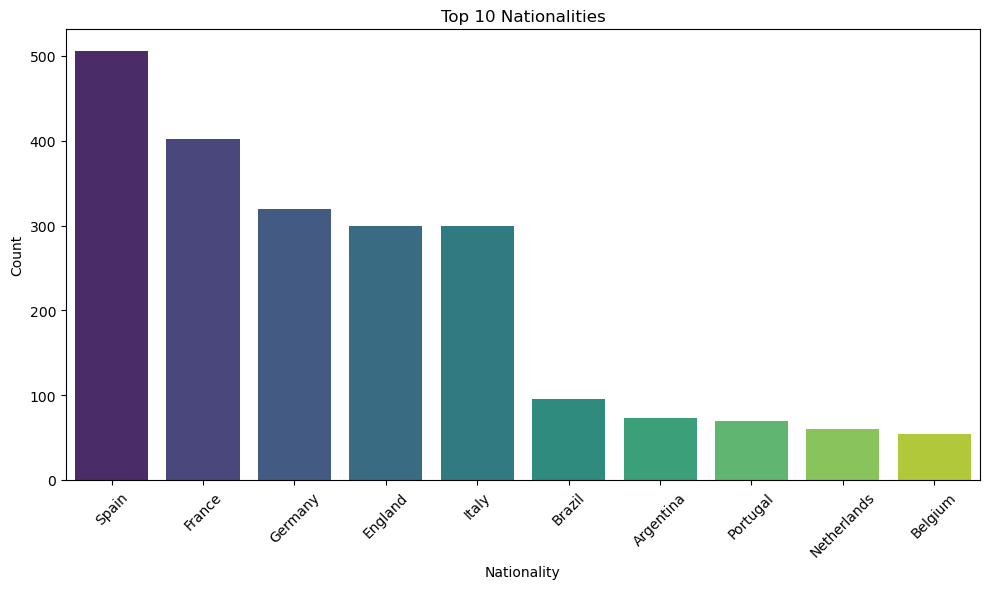

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
top10 = df['nationality'].value_counts().head(10).reset_index()
top10.columns = ['nationality', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='nationality', y='count', palette='viridis')
plt.title('Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
immigrants_league

,league_name,total_players,immigrant_players,immigrant_percentage,immigrant_nationality_breakdown,top_immigrant_continents
0,Serie A,673,388.0,57.65,"France (35), Argentina (25), Brazil (24), Spai...","Europe (256), South America (64)"
1,Premier League,636,361.0,56.76,"France (32), Brazil (29), Portugal (22), Spain...","Europe (229), South America (58)"
2,Ligue 1,554,273.0,49.28,"Senegal (21), Ivory Coast (18), Brazil (16), P...","Africa (131), Europe (95)"
3,Bundesliga,555,262.0,47.21,"France (32), Austria (27), Denmark (13), Nethe...","Europe (197), Africa (27)"
4,La Liga,694,246.0,35.45,"Argentina (27), France (21), Brazil (19), Urug...","Europe (110), South America (73)"


C:\Users\Player One\AppData\Local\Temp\ipykernel_17760\822465945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


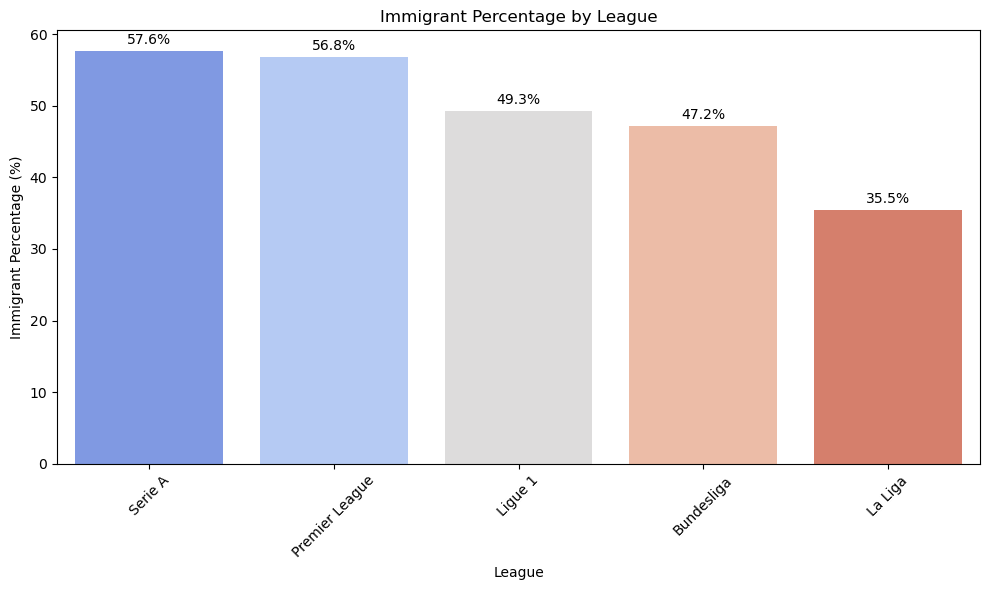

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

immigrants_league_sorted = immigrants_league.sort_values(by='immigrant_percentage', ascending=False)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=immigrants_league_sorted,
    x='league_name',
    y='immigrant_percentage',
    palette='coolwarm'
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.title('Immigrant Percentage by League')
plt.xlabel('League')
plt.ylabel('Immigrant Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

youngpos = pd.read_csv('youngest_by_position.csv')


print(youngpos)

    Unnamed: 0  player_id  team_id               name    position  \
0            0     191106       18        Simon Walde     Defence   
1            1     191130       19       Simon Simoni  Goalkeeper   
2            2     247243       61     Ollie Harrison    Midfield   
3            3     230517       64         Trey Nyoni    Midfield   
4            4     251079       73        Mikey Moore     Offence   
5            5     202283       81       Lamine Yamal     Offence   
6            6     244743       95       David Otorbi     Offence   
7            7     242550       98  Francesco Camarda     Offence   
8            8     215588      115      David Pejicic    Midfield   
9            9     250948      516      Darryl Bakola     Offence   
10          10     221819      521     Ayyoub Bouaddi    Midfield   

   date_of_birth nationality  age                    name.1  
0     2026-06-30     Germany   -1  Borussia Monchengladbach  
1     2027-06-30     Albania   -2       Eintrac

In [19]:
youngpos = youngpos[~youngpos['name'].isin(['Simon Walde', 'Simon Simoni'])]
youngpos = youngpos.reset_index(drop=True)
print(youngpos[['name', 'position', 'age']])

                name  position  age
0     Ollie Harrison  Midfield   17
1         Trey Nyoni  Midfield   17
2        Mikey Moore   Offence   17
3       Lamine Yamal   Offence   17
4       David Otorbi   Offence   17
5  Francesco Camarda   Offence   17
6      David Pejicic  Midfield   17
7      Darryl Bakola   Offence   17
8     Ayyoub Bouaddi  Midfield   17


In [23]:
import pandas as pd

youngnat = pd.read_csv('youngest_by_nationality.csv')

youngnat = youngnat[['name', 'age', 'nationality']]
print(youngnat)

                         name  age               nationality
0                Rijad Smajic   21        Bosnia-Herzegovina
1                 Ihlas Bebou   31                      Togo
2              Gustavo Puerta   21                  Colombia
3            Abdoulaye Kamara   20                    Guinea
4           Julien Duranville   19                   Belgium
5              Lovro Zvonarek   20                   Croatia
6         Jonathan Asp-Jensen   19                   Denmark
7                  Adam Aznou   18                   Morocco
8                 Anrie Chase   21                     Japan
9              Patrick Wimmer   23                   Austria
10           Spyros Angelidis   20                    Greece
11   Leandro Barreiro Martins   25                Luxembourg
12            Florent Muslija   26                    Kosovo
13          Chikwubuike Adamu   23                   Austria
14             Jaaso Jantunen   20                   Finland
15           Grant-Leon 

In [24]:
import pandas as pd

oldnat = pd.read_csv('oldest_by_nationality.csv')

oldnat = youngnat[['name', 'age', 'nationality']]
print(oldnat)

                         name  age               nationality
0                Rijad Smajic   21        Bosnia-Herzegovina
1                 Ihlas Bebou   31                      Togo
2              Gustavo Puerta   21                  Colombia
3            Abdoulaye Kamara   20                    Guinea
4           Julien Duranville   19                   Belgium
5              Lovro Zvonarek   20                   Croatia
6         Jonathan Asp-Jensen   19                   Denmark
7                  Adam Aznou   18                   Morocco
8                 Anrie Chase   21                     Japan
9              Patrick Wimmer   23                   Austria
10           Spyros Angelidis   20                    Greece
11   Leandro Barreiro Martins   25                Luxembourg
12            Florent Muslija   26                    Kosovo
13          Chikwubuike Adamu   23                   Austria
14             Jaaso Jantunen   20                   Finland
15           Grant-Leon 